# Ball Tracking using Matrix Methods

Below is an example of our ball tracking algorithm, including error analysis.

Import statements, uses math, numpy, and matplotlib packages and our built algorithm file.

In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt
from algorithm import Algorithm

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


# Initial Conditions

The initial conditions can be freely set by the user.

In [2]:
ax = 0.0
ay = -9.8
vx0 = 4.75
vy0 = 80.25
x0 = 0.0
y0 = 0.0

# Creation of Simulation Data of a Ball's Projectile Motion

The Cord function returns the coordinates of the point in either the x or y direction, given that directions velocity, acceleration, and the time shared between directions.

In [3]:
def Cord(v,a,t):
    return v*t+0.5*a*t**2

An initial overestimate of the time it takes the ball to hit the ground is generated off the data, and then the cordinates are generated for x and y.  Using y, we cut tmax down to the actual time the ball hits the ground and round it up to the nearest integer.

In [4]:
tmax = vy0**2 + vx0**2
t = np.arange(tmax)
x = Cord(vx0,ax,t)
y = Cord(vy0,ay,t)

tmax = math.ceil(2*math.sqrt(2*np.max(y)/abs(ay)))

t = np.arange(tmax)
x = Cord(vx0,ax,t)
y = Cord(vy0,ay,t)

# Plot of Simulation Data

Below is a plot of x and y, showing the balls trajectory over space.

Text(0, 0.5, 'y')

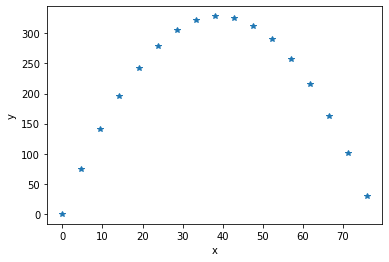

In [5]:
plt.plot(x,y, '*')
plt.xlabel('x')
plt.ylabel('y')

# Creation of Matrix of Ball SImulation Data to feed into Algorithm

Created a Matrix of the simiulation Ball Position.  This matrix is the only piece of information carried over from the original simulation.  The matrix must be square, thus we used the larger space dimention to make each frame square.  The matrix is 3D, the first 2 dimentions are x and y and the third, which need not be square, is time.

In [6]:
if (np.max(x) > np.max(y)):
    maxDim = math.ceil(np.max(x))+1
else:
    maxDim = math.ceil(np.max(y))+1
MATRIX = np.zeros((maxDim,maxDim,math.ceil(tmax)))

For every time frame, place a 1 in the matrix where the ball is located, and a zero elsewhere.

In [7]:
for i in range(tmax):
    MATRIX[int(x[i]),int(y[i]),i] = 1

# Below is the implementation of the algorithm.
A 1 dimentional matrix, named z, the same size as a side of the square frames is created, and has values in it listed from 0 to the max number of rows/columns (There are the same number of rows as there are columns as the matrix frames are square).  By takeing the dot products, we have $row=z\cdot M_i$ and $column=M_i\cdot z$, where $M_i$ is the square matrix at time i.  This is all contained in algorithm.py, in the Algorithm function.

In [8]:
row,column = Algorithm(MATRIX)

# Below is the plot of the results.

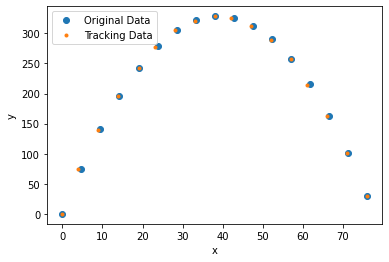

In [9]:
plt.plot(x,y, 'o', label = "Original Data")
plt.plot(row,column, '.', label = "Tracking Data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

As can be seen, the original data and the tracking data are very similar indeed.

Now lets take a look at the average error:

In [10]:
errorX = np.mean(abs(row-x))
errorY = np.mean(abs(column-y))

In [11]:
print("The error in the row calculations is ", errorX)
print("The error in the column calculations is ", errorY)

The error in the row calculations is  0.35294117647058826
The error in the column calculations is  0.44705882352938636


As can be seen, some error is evident in this system.  This is due to the fact that to make a continuous number line fit into a discrete matrix, we rounded the x and y coodinates down in order to have them fit in a matrix box.  Each matrix box is an integer value, so the decimal of the coordinates was erased.  This however gives us a well defined maximum average error of 0.5, half the size of a matrix box, across the board.

In [12]:
print("Max error point in rows for this run:", max(abs(row-x)))
print("Max error point in columns for this run:", max(abs(column-y)))

Max error point in rows for this run: 0.75
Max error point in columns for this run: 0.9000000000000057


However, the maximum error possible for a single box is .99999 repeating, as we rounded down to the nearest integer in constructing the matrix.